## 4.6 LightGBM

일반적으로 만 건 이하의 데이터 세트에 사용

In [1]:
# pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [3]:
dataset = load_breast_cancer()
cancer_df = pd.DataFrame(data=dataset.data, columns = dataset.feature_names)
cancer_df['target'] = dataset.target

X_features = cancer_df.iloc[:,:-1]
y_label = cancer_df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=156)

X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=156)

In [5]:
lgbm_wrapper = LGBMClassifier(n_estimators=400, learning_rate=0.05)

eval = [(X_tr, y_tr), (X_val, y_val)]
lgbm_wrapper.fit(X_tr, y_tr, early_stopping_rounds=50, eval_metric='logloss', eval_set=eval, verbose=True)
preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:,1]

[1]	training's binary_logloss: 0.625671	training's binary_logloss: 0.625671	valid_1's binary_logloss: 0.628248	valid_1's binary_logloss: 0.628248
Training until validation scores don't improve for 50 rounds.
[2]	training's binary_logloss: 0.588173	training's binary_logloss: 0.588173	valid_1's binary_logloss: 0.601106	valid_1's binary_logloss: 0.601106
[3]	training's binary_logloss: 0.554518	training's binary_logloss: 0.554518	valid_1's binary_logloss: 0.577587	valid_1's binary_logloss: 0.577587
[4]	training's binary_logloss: 0.523972	training's binary_logloss: 0.523972	valid_1's binary_logloss: 0.556324	valid_1's binary_logloss: 0.556324
[5]	training's binary_logloss: 0.49615	training's binary_logloss: 0.49615	valid_1's binary_logloss: 0.537407	valid_1's binary_logloss: 0.537407
[6]	training's binary_logloss: 0.470108	training's binary_logloss: 0.470108	valid_1's binary_logloss: 0.519401	valid_1's binary_logloss: 0.519401
[7]	training's binary_logloss: 0.446647	training's binary_loglos

In [6]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [7]:
get_clf_eval(y_test, preds, pred_proba)

오차 행렬
[[34  3]
 [ 2 75]]
정확도: 0.9561, 정밀도: 0.9615, 재현율: 0.9740,    F1: 0.9677, AUC:0.9888


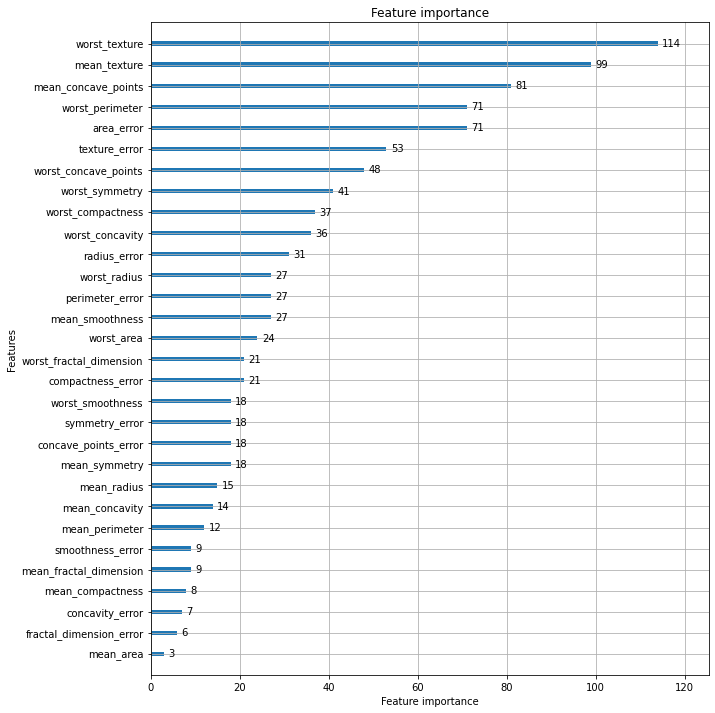

In [8]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(lgbm_wrapper, ax=ax)